## Assignment 6 - Unit Test Your Functions!

Follow the instructions in the following notebook cell. You will be graded on:

    - Whether your unit tests are passing
    - The completion of this notebook

## Part 1:

In [10]:
# import the stuff you need here: os, glob, natsort, numpy, matplotlib.pyplot, pandas:

# example import, don't edit this.
import sys
sys.path.append('../')   # appending your project to python path

# import the rest:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import os
import glob
import natsort


#### Data I/O:

First, in the `utils.py` file from the `functions` folder, recreate the function to get all the `.csv` data files:

```python
def get_files(path_pattern):
    Given a `path_pattern` describing the path to all your data files, sorts the matching data files in alphanumerical order and returns a list with all file paths.

    Input: 
        path_pattern (list): Path to all data files as described by a wildcard (*)
    Returns:
        files (list): Alphanumerical sorted list of all data files matching your path_pattern description.
```

Import it using relative imports and use it in the following cells to load your data. Remember `.`

In [11]:
# first import your utility function:
from functions.utils import get_files

# Provide the wildcard (*) string pattern for your data files:
data_dir = 'data'
data_files = '/*.csv'

data_pattern = os.path.abspath(data_dir) + data_files

# Use your utilities function to read and return a list of sorted data files: 
data_files_list = get_files(data_pattern) 
print('There are {} data csv files in the data folder'.format(len(data_files_list)))

There are 56 data csv files in the data folder


### Create DataFrame:

Use `pandas` to load your `.csv` file data and turn them into a `dataframe`, then display the first 5 entries of your `dataframe`:

In [12]:
# read in your csv files, concatenate all the csv's one by one into columns, and replace empty entries with 0's
df = pd.concat([pd.read_csv(f, usecols=['Value']) for f in data_files_list], axis=1).fillna(0)

# assign column numbers to your data frame
df.columns = np.arange(df.shape[1])

# Show the first 5 entries of your dataframe:
df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55
0,305.119,299.585,284.134,274.030,259.498,258.587,261.424,274.786,271.133,259.844,257.778,286.847,287.072,270.771,303.180,268.303,254.885,271.793,269.984,317.782,299.732,276.325,311.781,297.633,272.780,282.112,261.619,265.183,256.423,259.363,306.509,290.500,435.687,369.361,318.823,312.436,260.248,263.503,280.836,268.965,313.541,286.363,251.707,266.070,301.185,277.280,274.816,266.868,258.534,252.913,262.916,255.959,272.325,247.210,291.965,260.800
1,311.217,303.344,285.376,279.933,259.565,258.002,261.486,272.011,278.229,257.284,258.652,288.032,288.040,268.589,304.116,269.895,257.405,271.395,273.243,311.260,297.083,275.257,312.262,294.682,275.559,280.170,261.737,264.861,258.155,260.957,322.999,296.472,456.168,378.417,323.447,315.606,263.034,264.934,284.133,271.134,312.098,292.343,250.438,265.895,303.013,286.125,275.208,267.729,257.029,250.244,261.190,260.099,282.765,248.638,296.283,262.489
2,326.685,306.195,289.555,279.445,257.737,261.400,259.558,275.921,278.489,262.490,260.871,291.565,291.553,269.567,306.908,274.626,261.112,271.211,276.771,312.696,297.438,276.709,315.716,300.863,277.104,281.481,259.713,263.476,261.803,262.494,328.960,307.486,482.019,394.725,331.635,317.626,266.932,273.358,284.622,273.166,313.228,298.689,251.952,267.230,311.448,298.633,278.905,269.762,256.576,252.016,260.797,264.321,288.183,249.163,298.079,263.869
3,334.542,315.992,291.688,285.562,265.585,271.941,257.475,273.572,277.763,263.175,261.513,299.104,298.733,270.306,308.277,274.107,263.855,280.436,283.551,316.302,297.755,275.453,321.938,308.330,277.304,284.726,265.561,264.726,268.727,260.854,338.921,317.312,510.145,407.428,343.587,319.218,267.413,292.803,283.241,276.533,320.257,301.324,253.831,265.504,316.381,304.359,286.011,274.107,255.490,255.307,259.653,269.742,287.018,253.169,300.793,266.294
4,336.459,328.338,294.633,292.300,268.526,274.761,259.245,278.288,284.147,259.553,263.977,307.197,307.156,269.673,301.541,273.699,266.133,285.243,294.666,331.484,302.318,277.744,330.384,310.254,286.175,284.772,269.361,263.749,274.248,260.788,345.203,323.142,544.671,423.461,351.555,323.870,265.484,340.911,288.212,278.782,324.092,312.879,258.033,264.212,315.358,310.311,290.311,284.979,257.433,252.361,262.665,275.553,282.375,255.589,303.503,268.537


### Realign our dataframes so we match the peak fluorescent signals:

In `functions.utils.py`, add the following functions:

 - `find_middle()` - find the middle index of input data column and returns it
 - `realign_data()` - Center data around maximum or center of shortest column, padding with 0's, returns 1) a new dataframe with realigned columns and 2) the amount each column was shifted

In `tests` folder, create a file named `test_utils.py` and add the following unit tests functions:

 - `test_find_middle_even()` - 
 - `test_find_middle_odd()` - 
 - `test_realign_max()` - 

Use your terminal to test these functions with `pytest assignment/tests`. Once all your tests are passing, import the functions and use them in the following cells:

In [52]:
# realign your data around its maximum or center, whichever one you like better: 
from functions.utils import realign_data
df_aligned, shifts = realign_data(df, "max")

print('My realigned data frame has shape {}'.format(df_aligned.shape))

My realigned data frame has shape (65, 56)


### Normalize signal and visualize:

Now we can normalize each column between 0-1 using `scikitlearn`'s `minmaxscale` function and visualize them. <em> In your plots, properly label all axis and colorbars with appropriate name description and units:

In [70]:
# Normalize every column entry of your realigned dataframe:
from sklearn.preprocessing import minmax_scale

# pre-allocate an empty dataframe of 0's to be filled with normalized values, the index and column of this dataframe will be the same as the df_aligned dataframe:
df_normalized = pd.DataFrame(0, index=df_aligned.index, columns=df_aligned.columns)

# fill in the `df_normalized` dataframe with normalized columns:
for column, vals in df_aligned.iteritems():
    # find the indices of the column that are not 0, only normalize those:
    ind = df_aligned.index[df_aligned[column]!=0].tolist()
    # Normalize of those:
    df_normalized.loc[ind, column] = minmax_scale(df_aligned.loc[ind, column].values)


Text(0, 0.5, 'Normalized Signal Intensity')

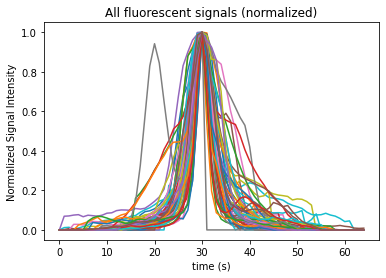

In [74]:
# Use matplotlib to plot all the fluorescent signals:
plt.plot(df_normalized.values)
plt.title("All fluorescent signals (normalized)")
plt.xlabel("time (s)")
plt.ylabel("Normalized Signal Intensity")

Text(0, 0.5, 'Normalized Signal Intensity')

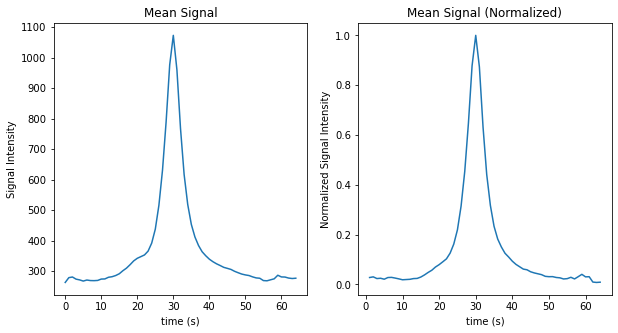

In [66]:
# Now instead of all signals, plot the average signal:
# use numpy to find the mean first:
mean_signal = np.zeros(df_aligned.shape[0])
for index, row in df_aligned.iterrows():
    val = row[row != 0] 
    mean_signal[index] = np.mean(val)

mean_signal_normalized = np.zeros(df_normalized.shape[0])
for index, row in df_normalized.iterrows():
    val = row[row != 0] 
    mean_signal_normalized[index] = np.mean(val)
#plot
axs = plt.figure(figsize = (10,5)).subplots(1,2)
plt.subplot(1,2,1)
plt.plot(mean_signal)
plt.title('Mean Signal')
plt.xlabel('time (s)')
plt.ylabel('Signal Intensity')
plt.subplot(1,2,2)
plt.plot(mean_signal_normalized)
plt.title('Mean Signal (Normalized)')
plt.xlabel('time (s)')
plt.ylabel('Normalized Signal Intensity')

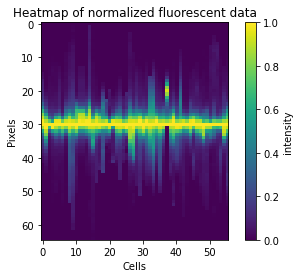

In [67]:
# Finally visualize your aligned, and normalized fluorescent data in a heatmap:
plt.imshow(df_normalized.values)
plt.title("Heatmap of normalized fluorescent data")
plt.xlabel('Cells')
plt.ylabel('Pixels')
cbar = plt.colorbar()
cbar.set_label('intensity')

## Part 2:

Repeat the analysis, but instead of realigning the fluorescent signals to it's maximum peaks. Modify the `realign_data` function so that it requires a second input named `aligned`. In the function, if `align == "max"`, the code executes the max peak alignment like before.

But if `align == "center"`, the function will find the mid point of `input_data[column ! = 0]`, the middle index of non-zero values. Then shifts the values according to the new criteria.

After adding this feature to `functions.utils.realign_data`, write the appropriate test for this new feature in `tests.test_utils.py`, make sure this test is passing. Then implement the new alignment and revisualize the results, again making sure all axis and colorbars are properly labeled:

In [68]:
# apply your new realignment here
df_aligned_center, shifts_center = realign_data(df, "center")

print('My realigned data (to the center) frame has shape {}'.format(df_aligned_center.shape))

# pre-allocate an empty dataframe of 0's to be filled with normalized values, the index and column of this dataframe will be the same as the df_aligned dataframe:
df_normalized_center = pd.DataFrame(0, index=df_aligned_center.index, columns=df_aligned_center.columns)

# fill in the `df_normalized` dataframe with normalized columns:
for column, vals in df_aligned_center.iteritems():
    # find the indices of the column that are not 0, only normalize those:
    ind = df_aligned_center.index[df_aligned_center[column]!=0].tolist()
    # Normalize of those:
    df_normalized_center.loc[ind, column] = minmax_scale(df_aligned_center.loc[ind, column].values)


My realigned data (to the center) frame has shape (65, 56)


Text(0, 0.5, 'Normalized Signal Intensity')

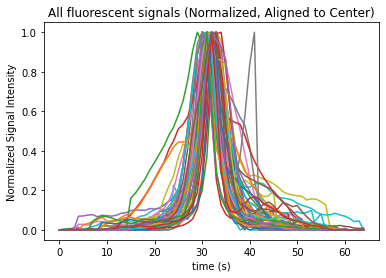

In [55]:
# visualize all of the newly aligned data
plt.plot(df_normalized_center.values)
plt.title("All fluorescent signals (Normalized, Aligned to Center)")
plt.xlabel("time (s)")
plt.ylabel("Normalized Signal Intensity")

Text(0, 0.5, 'Signal Intensity')

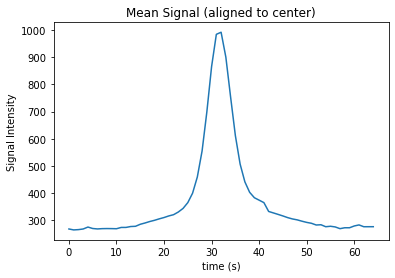

In [69]:
# visualize the mean of the newly aligned data
mean_signal_center = np.zeros(df_aligned_center.shape[0])
for index, row in df_aligned_center.iterrows():
    val = row[row != 0] 
    mean_signal_center[index] = np.mean(val)

mean_signal_normalized_center = np.zeros(df_normalized_center.shape[0])
for index, row in df_normalized_center.iterrows():
    val = row[row != 0] 
    mean_signal_normalized_center[index] = np.mean(val)

plt.plot(mean_signal_center)
plt.title("Mean Signal (aligned to center)")
plt.xlabel("time (s)")
plt.ylabel("Signal Intensity")

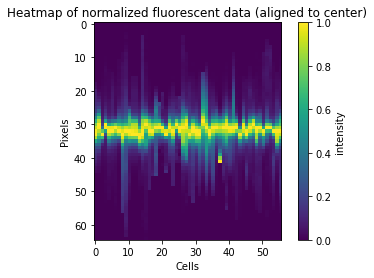

In [62]:
# visualize the heatmap
plt.imshow(df_normalized_center.values)
plt.title("Heatmap of normalized fluorescent data (aligned to center)")
plt.xlabel('Cells')
plt.ylabel('Pixels')
cbar = plt.colorbar()
cbar.set_label('intensity')

Lastly, push your submission branch, the `pytests` should automatically be executed upon your push. Make sure these tests are passing! Again, add me as a collaborator, and a reviewer in your pull request that merges `submission` into `main`. 